# Introduction

The dataset was retrieved from the weblink below
Patterns and Characteristics of Recurrent Breast Cancer 2023. Available from: https://www.kaggle.com/datasets/tanshihjen/recurrent-breastcancerdataset.

## Import Libraries

In [3]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import seaborn as sns

## Loading The Dataset

In [4]:
df = pd.read_excel("Breast Cancer Data.xlsx")

In [5]:
df.head(20)

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,target
0,30-39,premeno,30-34,0-2,no,3,left,left_low,no,no-recurrence-events
1,40-49,premeno,20-24,0-2,no,2,right,right_up,no,no-recurrence-events
2,40-49,premeno,20-24,0-2,no,2,left,left_low,no,no-recurrence-events
3,60-69,ge40,15-19,0-2,no,2,right,left_up,no,no-recurrence-events
4,40-49,premeno,0-4,0-2,no,2,right,right_low,no,no-recurrence-events
5,60-69,ge40,15-19,0-2,no,2,left,left_low,no,no-recurrence-events
6,50-59,premeno,25-29,0-2,no,2,left,left_low,no,no-recurrence-events
7,60-69,ge40,20-24,0-2,no,1,left,left_low,no,no-recurrence-events
8,40-49,premeno,50-54,0-2,no,2,left,left_low,no,no-recurrence-events
9,40-49,premeno,20-24,0-2,no,2,right,left_up,no,no-recurrence-events


In [6]:
df.columns

Index(['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig',
       'breast', 'breast-quad', 'irradiat', 'target'],
      dtype='object')

In [7]:
df.rename(columns = {'target': 'relapse'}, inplace = True)

In [8]:
df.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,relapse
0,30-39,premeno,30-34,0-2,no,3,left,left_low,no,no-recurrence-events
1,40-49,premeno,20-24,0-2,no,2,right,right_up,no,no-recurrence-events
2,40-49,premeno,20-24,0-2,no,2,left,left_low,no,no-recurrence-events
3,60-69,ge40,15-19,0-2,no,2,right,left_up,no,no-recurrence-events
4,40-49,premeno,0-4,0-2,no,2,right,right_low,no,no-recurrence-events


In [9]:
df.shape

(286, 10)

In [10]:
df.isna().sum()

age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      8
deg-malig      0
breast         0
breast-quad    1
irradiat       0
relapse        0
dtype: int64

In [11]:
df.dropna(inplace = True)

In [12]:
df.shape

(277, 10)

In [13]:
df.isna().sum()

age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
relapse        0
dtype: int64

In [14]:
df.reset_index(drop=True)

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,relapse
0,30-39,premeno,30-34,0-2,no,3,left,left_low,no,no-recurrence-events
1,40-49,premeno,20-24,0-2,no,2,right,right_up,no,no-recurrence-events
2,40-49,premeno,20-24,0-2,no,2,left,left_low,no,no-recurrence-events
3,60-69,ge40,15-19,0-2,no,2,right,left_up,no,no-recurrence-events
4,40-49,premeno,0-4,0-2,no,2,right,right_low,no,no-recurrence-events
...,...,...,...,...,...,...,...,...,...,...
272,30-39,premeno,30-34,0-2,no,2,left,left_up,no,recurrence-events
273,30-39,premeno,20-24,0-2,no,3,left,left_up,yes,recurrence-events
274,60-69,ge40,20-24,0-2,no,1,right,left_up,no,recurrence-events
275,40-49,ge40,30-34,3-5,no,3,left,left_low,no,recurrence-events


In [15]:
df['age'].unique()

array(['30-39', '40-49', '60-69', '50-59', '70-79', '20-29'], dtype=object)

In [16]:
df['relapse'].unique()

array(['no-recurrence-events', 'recurrence-events'], dtype=object)

## Data Preprocessing

In [18]:
df2 = df.copy()

In [19]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Loop through each column in the DataFrame
for column in df2.columns:
    # Check if the column dtype is object (indicating categorical data)
    if df2[column].dtype == 'object':
        # Fit label encoder and transform values
        df2[column] = label_encoder.fit_transform(df2[column])

# Display the updated DataFrame
print(df2)

     age  menopause  tumor-size  inv-nodes  node-caps  deg-malig  breast  \
0      1          2           5          0          0          3       0   
1      2          2           3          0          0          2       1   
2      2          2           3          0          0          2       0   
3      4          0           2          0          0          2       1   
4      2          2           0          0          0          2       1   
..   ...        ...         ...        ...        ...        ...     ...   
281    1          2           5          0          0          2       0   
282    1          2           3          0          0          3       0   
283    4          0           3          0          0          1       1   
284    2          0           5          4          0          3       0   
285    3          0           5          4          0          3       0   

     breast-quad  irradiat  relapse  
0              1         0        0  
1          

In [20]:
df2.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,relapse
0,1,2,5,0,0,3,0,1,0,0
1,2,2,3,0,0,2,1,4,0,0
2,2,2,3,0,0,2,0,1,0,0
3,4,0,2,0,0,2,1,2,0,0
4,2,2,0,0,0,2,1,3,0,0


In [343]:
X = df2[['tumor-size', 'inv-nodes', 'node-caps', 'deg-malig', 'irradiat']].values
X[0:5]

array([[5, 0, 0, 3, 0],
       [3, 0, 0, 2, 0],
       [3, 0, 0, 2, 0],
       [2, 0, 0, 2, 0],
       [0, 0, 0, 2, 0]], dtype=int64)

In [344]:
y = df2['relapse'].values

In [345]:
y[0:5]

array([0, 0, 0, 0, 0])

In [346]:
df2['relapse'].unique()

array([0, 1])

In [347]:
df2['age'].unique()

array([1, 2, 4, 3, 5, 0])

In [348]:
df2['menopause'].unique()

array([2, 0, 1])

In [349]:
df2['tumor-size'].unique()

array([ 5,  3,  2,  0,  4, 10,  1,  7,  6,  9,  8])

In [350]:
df2['inv-nodes'].unique()

array([0, 5, 6, 4, 2, 1, 3])

In [351]:
df2['node-caps'].unique()

array([0, 1])

In [352]:
df2['deg-malig'].unique()

array([3, 2, 1], dtype=int64)

In [353]:
df2['breast'].unique()

array([0, 1])

In [354]:
df2['breast-quad'].unique()

array([1, 4, 2, 3, 0])

In [355]:
df2['irradiat'].unique()

array([0, 1])

In [356]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, stratify = y, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (221, 5) (221,)
Test set: (56, 5) (56,)


## Evaluating Correlation Between Predictor and Target Variables

In [357]:
import pandas as pd
from scipy.stats import chi2_contingency

# Example DataFrame with multiple categorical variables

# Create a contingency table
contingency_table = pd.crosstab(
    df['relapse'],
    [
        df['age'],
    ]
)
observed_chi2, _, _, _ = chi2_contingency(contingency_table)
n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape) - 1
cramers_v = np.sqrt(observed_chi2 / (n * min_dim))

print(f"Cramér's V: {cramers_v}")

Cramér's V: 0.15223702043024515


In [358]:
contingency_table = pd.crosstab(
    df['relapse'],
    [
        df['menopause'],
    ]
)
observed_chi2, _, _, _ = chi2_contingency(contingency_table)
n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape) - 1
cramers_v = np.sqrt(observed_chi2 / (n * min_dim))

print(f"Cramér's V: {cramers_v}")

Cramér's V: 0.10491168418085384


In [359]:
contingency_table = pd.crosstab(
    df['relapse'],
    [
        df['tumor-size'],
    ]
)
observed_chi2, _, _, _ = chi2_contingency(contingency_table)
n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape) - 1
cramers_v = np.sqrt(observed_chi2 / (n * min_dim))

print(f"Cramér's V: {cramers_v}")

Cramér's V: 0.26190299923884897


In [360]:
contingency_table = pd.crosstab(
    df['relapse'],
    [
        df['inv-nodes'],
    ]
)
observed_chi2, _, _, _ = chi2_contingency(contingency_table)
n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape) - 1
cramers_v = np.sqrt(observed_chi2 / (n * min_dim))

print(f"Cramér's V: {cramers_v}")

Cramér's V: 0.34817844106844337


In [361]:
contingency_table = pd.crosstab(
    df['relapse'],
    [
        df['node-caps'],
    ]
)
observed_chi2, _, _, _ = chi2_contingency(contingency_table)
n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape) - 1
cramers_v = np.sqrt(observed_chi2 / (n * min_dim))

print(f"Cramér's V: {cramers_v}")

Cramér's V: 0.279121734421927


In [362]:
contingency_table = pd.crosstab(
    df['relapse'],
    [
        df['deg-malig'],
    ]
)
observed_chi2, _, _, _ = chi2_contingency(contingency_table)
n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape) - 1
cramers_v = np.sqrt(observed_chi2 / (n * min_dim))

print(f"Cramér's V: {cramers_v}")

Cramér's V: 0.3551380993117548


In [363]:
contingency_table = pd.crosstab(
    df['relapse'],
    [
        df['breast'],
    ]
)
observed_chi2, _, _, _ = chi2_contingency(contingency_table)
n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape) - 1
cramers_v = np.sqrt(observed_chi2 / (n * min_dim))

print(f"Cramér's V: {cramers_v}")

Cramér's V: 0.03335863006621423


In [364]:
contingency_table = pd.crosstab(
    df['relapse'],
    [
        df['breast-quad'],
    ]
)
observed_chi2, _, _, _ = chi2_contingency(contingency_table)
n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape) - 1
cramers_v = np.sqrt(observed_chi2 / (n * min_dim))

print(f"Cramér's V: {cramers_v}")

Cramér's V: 0.10931857122458373


In [365]:
contingency_table = pd.crosstab(
    df['relapse'],
    [
        df['irradiat'],
    ]
)
observed_chi2, _, _, _ = chi2_contingency(contingency_table)
n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape) - 1
cramers_v = np.sqrt(observed_chi2 / (n * min_dim))

print(f"Cramér's V: {cramers_v}")

Cramér's V: 0.2164990489313846


In [366]:
contingency_table = pd.crosstab(
    df['relapse'],
    [
        df['tumor-size'],
        df['inv-nodes'],
        df['node-caps'],
        df['deg-malig'],
        df['irradiat'],
    ]
)
observed_chi2, _, _, _ = chi2_contingency(contingency_table)
n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape) - 1
cramers_v = np.sqrt(observed_chi2 / (n * min_dim))

print(f"Cramér's V: {cramers_v}")

Cramér's V: 0.7375454368962628


In [367]:
contingency_table = pd.crosstab(
    df['relapse'],
    [
        df['age'],
        df['menopause'],
        df['tumor-size'],
        df['inv-nodes'],
        df['node-caps'],
        df['deg-malig'],
        df['breast'],
        df['breast-quad'],
        df['irradiat'],
    ]
)
observed_chi2, _, _, _ = chi2_contingency(contingency_table)
n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape) - 1
cramers_v = np.sqrt(observed_chi2 / (n * min_dim))

print(f"Cramér's V: {cramers_v}")

Cramér's V: 0.9719819376969948


# Testing ML Models

## K Nearest Neighbors

In [368]:
KNN = KNeighborsClassifier(n_neighbors=4)
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [369]:
predictions_knn = KNN.predict(X_test)

In [370]:
KNN_Accuracy_Score = metrics.accuracy_score(predictions_knn, y_test)
KNN_JaccardIndex = metrics.jaccard_score(predictions_knn, y_test)
KNN_F1_Score = metrics.f1_score(predictions_knn, y_test)

In [371]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, KNN.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, predictions_knn))

Train set Accuracy:  0.7647058823529411
Test set Accuracy:  0.7857142857142857


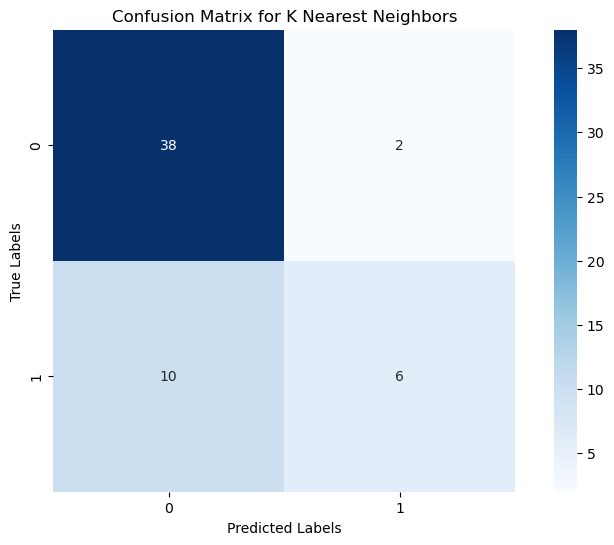

Train set Accuracy:  0.7647058823529411
Test set Accuracy:  0.7857142857142857
Jaccard Score:  0.3333333333333333
F1 Score:  0.5


In [372]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, predictions_knn)

# Plot confusion matrix with color bar on the right side
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=True, cbar_kws={'orientation': 'vertical'}, square=True)
plt.title("Confusion Matrix for K Nearest Neighbors")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Additional accuracy printing
train_accuracy = accuracy_score(y_train, KNN.predict(X_train))
test_accuracy = accuracy_score(y_test, predictions_knn)
jaccard = jaccard_score(y_test, predictions_knn)
f1 = f1_score(y_test, predictions_knn)

print("Train set Accuracy: ", train_accuracy)
print("Test set Accuracy: ", test_accuracy)
print("Jaccard Score: ", jaccard)
print("F1 Score: ", f1)

## Decision Tree ##

In [373]:
Tree = DecisionTreeClassifier()
Tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [374]:
predictions_tree = Tree.predict(X_test)

In [375]:
Tree_Accuracy_Score = metrics.accuracy_score(predictions_tree, y_test)
Tree_JaccardIndex = metrics.jaccard_score(predictions_tree, y_test)
Tree_F1_Score = metrics.f1_score(predictions_tree, y_test)

In [376]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, Tree.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, predictions_tree))

Train set Accuracy:  0.8552036199095022
Test set Accuracy:  0.7857142857142857


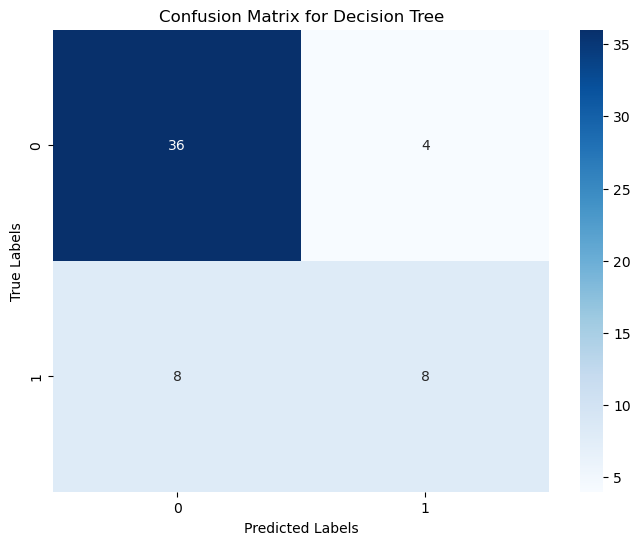

Train set Accuracy:  0.8552036199095022
Test set Accuracy:  0.7857142857142857
Jaccard Score:  0.4
F1 Score:  0.5714285714285715


In [377]:
# Calculate confusion matrix
conf_matrix_tree = confusion_matrix(y_test, predictions_tree)

# Plot confusion matrix with color bar on the right side
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tree, annot=True, fmt="d", cmap="Blues", cbar=True, cbar_kws={'orientation': 'vertical'})
plt.title("Confusion Matrix for Decision Tree")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Additional accuracy printing
train_accuracy_tree = accuracy_score(y_train, Tree.predict(X_train))
test_accuracy_tree = accuracy_score(y_test, predictions_tree)
jaccard_tree = jaccard_score(y_test, predictions_tree)
f1_tree = f1_score(y_test, predictions_tree)

print("Train set Accuracy: ", train_accuracy_tree)
print("Test set Accuracy: ", test_accuracy_tree)
print("Jaccard Score: ", jaccard_tree)
print("F1 Score: ", f1_tree)

## Logistic Regression ##

In [378]:
LR = LogisticRegression(solver='liblinear')
LR.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [379]:
predictions_lr = LR.predict(X_test)

In [380]:
LR_Accuracy_Score = metrics.accuracy_score(y_test, predictions_lr)
LR_JaccardIndex = metrics.jaccard_score(y_test, predictions_lr)
LR_F1_Score = metrics.f1_score(y_test, predictions_lr)
LR_Log_Loss = metrics.log_loss(y_test, predictions_lr)

In [381]:
from sklearn.metrics import jaccard_score
print("Jaccard Score: ", jaccard_score(y_test, predictions_lr))

Jaccard Score:  0.4090909090909091


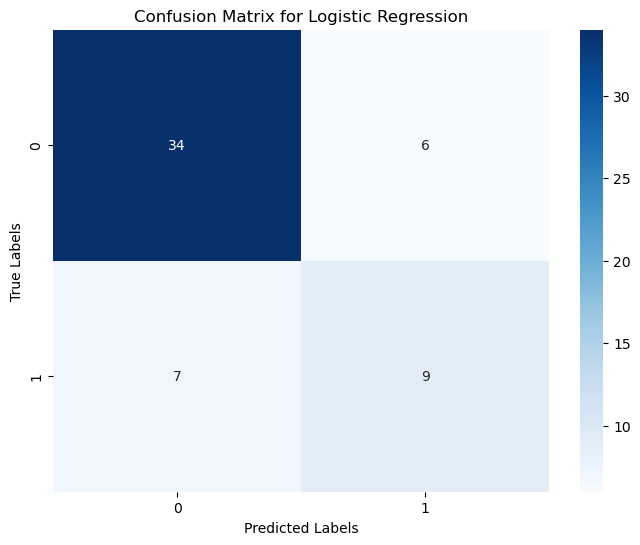

Train set Accuracy:  0.7601809954751131
Test set Accuracy:  0.7678571428571429
Jaccard Score:  0.4090909090909091
F1 Score:  0.5806451612903225
Log Loss:  8.367276679616483


In [382]:
# Calculate confusion matrix
conf_matrix_lr = confusion_matrix(y_test, predictions_lr)

# Plot confusion matrix with color bar on the right side
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt="d", cmap="Blues", cbar=True, cbar_kws={'orientation': 'vertical'})
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Additional accuracy printing
train_accuracy_lr = accuracy_score(y_train, LR.predict(X_train))
test_accuracy_lr = accuracy_score(y_test, predictions_lr)
jaccard_lr = jaccard_score(y_test, predictions_lr)
f1_lr = f1_score(y_test, predictions_lr)
logloss_lr = log_loss(y_test, predictions_lr)

print("Train set Accuracy: ", train_accuracy_lr)
print("Test set Accuracy: ", test_accuracy_lr)
print("Jaccard Score: ", jaccard_lr)
print("F1 Score: ", f1_lr)
print("Log Loss: ", logloss_lr)

## Support Vector Machine ##

In [383]:
SVM = svm.SVC(probability=True)
SVM.fit(X_train, y_train)

SVC(probability=True)

In [384]:
predictions_svm = SVM.predict(X_test)

In [385]:
SVM_Accuracy_Score = metrics.accuracy_score(predictions_svm, y_test)
SVM_JaccardIndex = metrics.jaccard_score(predictions_svm, y_test)
SVM_F1_Score = metrics.f1_score(predictions_svm, y_test)

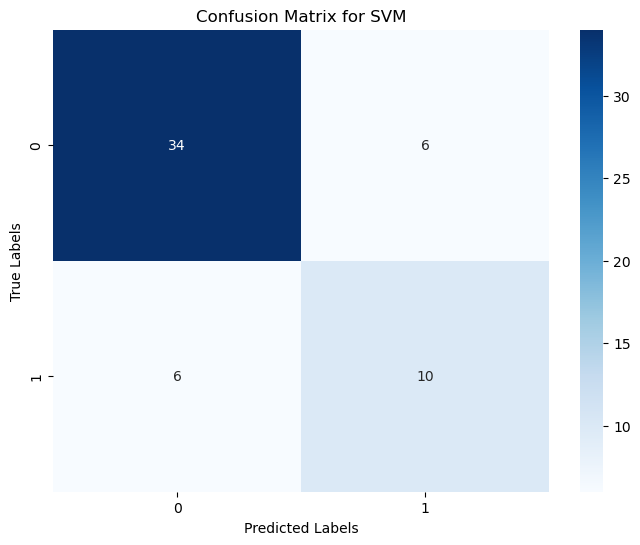

SVM Train set Accuracy:  0.7330316742081447
SVM Test set Accuracy:  0.7857142857142857
SVM Jaccard Score:  0.45454545454545453
SVM F1 Score:  0.625


In [386]:
# Calculate confusion matrix
conf_matrix_svm = confusion_matrix(y_test, predictions_svm)

# Plot confusion matrix with color bar on the right side
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues", cbar=True, cbar_kws={'orientation': 'vertical'})
plt.title("Confusion Matrix for SVM")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Additional accuracy printing
train_accuracy_svm = accuracy_score(y_train, SVM.predict(X_train))
test_accuracy_svm = accuracy_score(y_test, predictions_svm)
jaccard_svm = jaccard_score(y_test, predictions_svm)
f1_svm = f1_score(y_test, predictions_svm)

print("SVM Train set Accuracy: ", train_accuracy_svm)
print("SVM Test set Accuracy: ", test_accuracy_svm)
print("SVM Jaccard Score: ", jaccard_svm)
print("SVM F1 Score: ", f1_svm)

In [387]:
from sklearn.metrics import f1_score
print("F1 Score: ", f1_score(y_test, predictions_svm, average='weighted'))

F1 Score:  0.7857142857142857


In [388]:
from sklearn.metrics import jaccard_score
print("Jaccard Score: ", jaccard_score(y_test, predictions_svm,))

Jaccard Score:  0.45454545454545453


## ROC

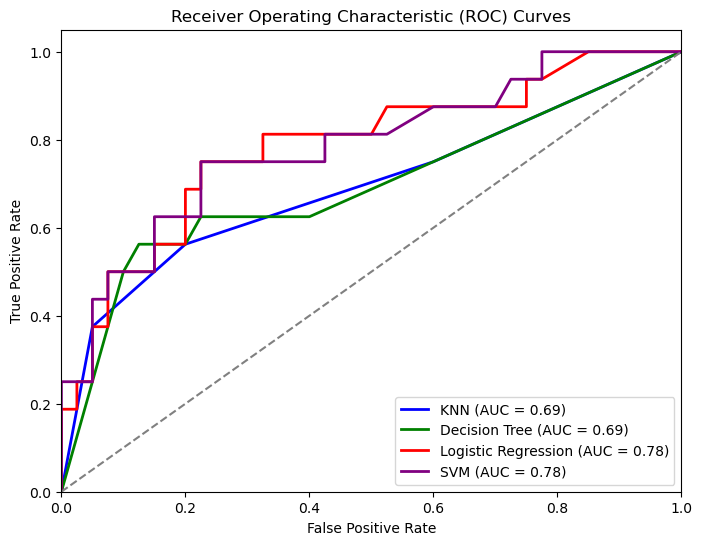

In [389]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# ROC Curve and AUC for K Nearest Neighbors
probabilities_knn = KNN.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, probabilities_knn)
auc_knn = roc_auc_score(y_test, probabilities_knn)

plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label='KNN (AUC = %0.2f)' % auc_knn)

# ROC Curve and AUC for Decision Tree
probabilities_tree = Tree.predict_proba(X_test)[:, 1]
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, probabilities_tree)
auc_tree = roc_auc_score(y_test, probabilities_tree)

plt.plot(fpr_tree, tpr_tree, color='green', lw=2, label='Decision Tree (AUC = %0.2f)' % auc_tree)

# ROC Curve and AUC for Logistic Regression
probabilities_lr = LR.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, probabilities_lr)
auc_lr = roc_auc_score(y_test, probabilities_lr)

plt.plot(fpr_lr, tpr_lr, color='red', lw=2, label='Logistic Regression (AUC = %0.2f)' % auc_lr)

# ROC Curve and AUC for SVM
probabilities_svm = SVM.predict_proba(X_test)[:, 1]
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, probabilities_svm)
auc_svm = roc_auc_score(y_test, probabilities_svm)

plt.plot(fpr_svm, tpr_svm, color='purple', lw=2, label='SVM (AUC = %0.2f)' % auc_svm)

# Plot the ROC curve for each classifier
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

# Descriptive Visualization

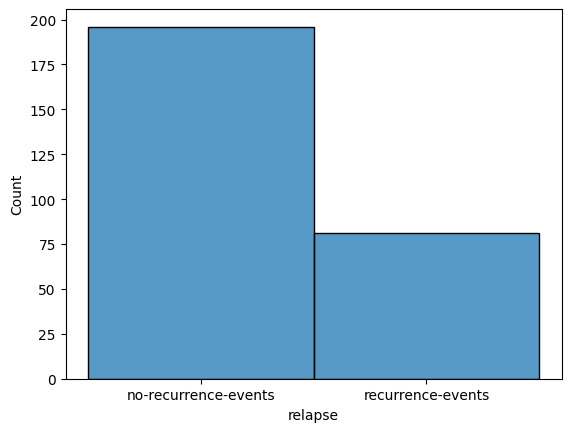

In [221]:
sns.histplot(data = df['relapse']);

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 277 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          277 non-null    object
 1   menopause    277 non-null    object
 2   tumor-size   277 non-null    object
 3   inv-nodes    277 non-null    object
 4   node-caps    277 non-null    object
 5   deg-malig    277 non-null    int64 
 6   breast       277 non-null    object
 7   breast-quad  277 non-null    object
 8   irradiat     277 non-null    object
 9   relapse      277 non-null    object
dtypes: int64(1), object(9)
memory usage: 23.8+ KB


In [223]:
df['age'].value_counts(ascending = True)

age
20-29     1
70-79     5
30-39    36
60-69    55
40-49    89
50-59    91
Name: count, dtype: int64

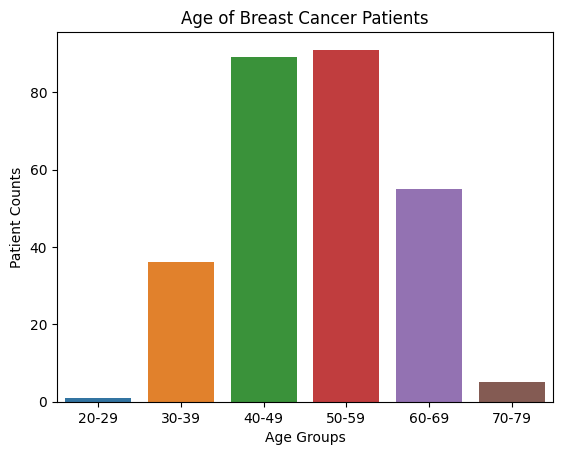

In [224]:
age_range = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
age_counts = [1, 36, 89, 91, 55, 5]
ax = sns.barplot(x = age_range, y = age_counts)
ax.set_xlabel("Age Groups")
ax.set_ylabel("Patient Counts")
ax.set_title("Age of Breast Cancer Patients")
plt.show()

In [225]:
df['menopause'].value_counts(ascending = True)

menopause
lt40         5
ge40       123
premeno    149
Name: count, dtype: int64

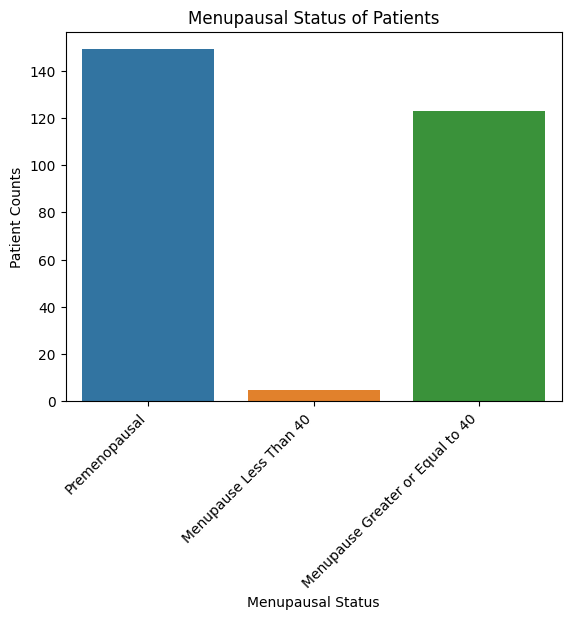

In [226]:
menu_status = ['Premenopausal', 'Menupause Less Than 40', 'Menupause Greater or Equal to 40']
menu_values = [149, 5, 123]
ax = sns.barplot(x = menu_status, y = menu_values)
ax.set_xlabel("Menupausal Status")
ax.set_ylabel("Patient Counts")
ax.set_title("Menupausal Status of Patients")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

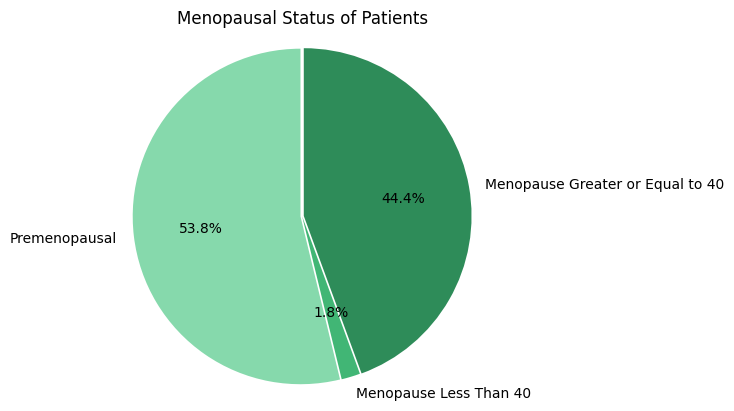

In [227]:
menu_status = ['Premenopausal', 'Menopause Less Than 40', 'Menopause Greater or Equal to 40']
menu_values = [149, 5, 123]

# Specify the degree of separation for each slice
explode = (0.01, 0, 0.01)  # Separation for the first slice (Premenopausal)
colors = colors = ['#86D9AC', '#41B675', '#2E8C59']
# Create a pie chart with separation
plt.pie(menu_values, labels=menu_status, autopct='%1.1f%%', startangle=90, explode=explode, colors = colors)

plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.title("Menopausal Status of Patients")

plt.show()

In [228]:
df['tumor-size'].value_counts(ascending = True)

tumor-size
45-49     3
5-9       4
0-4       8
50-54     8
35-39    19
40-44    22
10-14    28
15-19    29
20-24    48
25-29    51
30-34    57
Name: count, dtype: int64

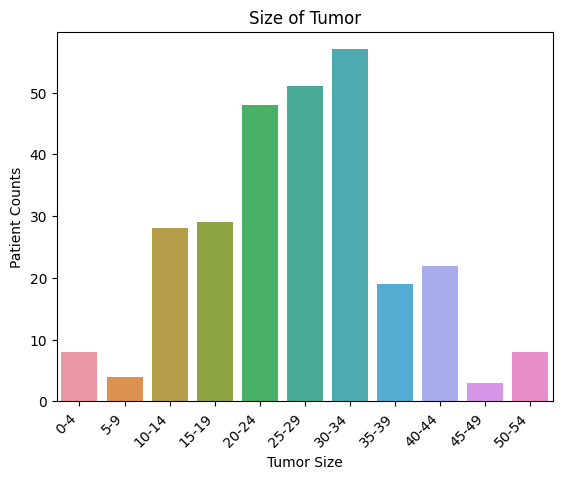

In [229]:
tumor_size = ["0-4", "5-9", "10-14", "15-19", "20-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50-54"]
tumor_values = [8, 4, 28, 29, 48, 51, 57, 19, 22, 3, 8]
ax = sns.barplot(x = tumor_size, y = tumor_values)
ax.set_xlabel("Tumor Size")
ax.set_ylabel("Patient Counts")
ax.set_title("Size of Tumor")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = 'right')
plt.show()

In [230]:
df['inv-nodes'].value_counts(ascending = True)

inv-nodes
24-26      1
12-14      3
15-17      6
9-11       7
6-8       17
3-5       34
0-2      209
Name: count, dtype: int64

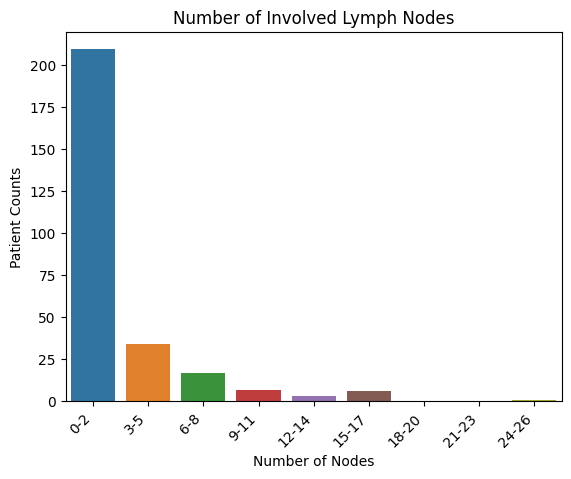

In [231]:
inv_nodes = ["0-2", "3-5", "6-8", "9-11", "12-14", "15-17", "18-20", "21-23", "24-26"]
inv_values = [209, 34, 17, 7, 3, 6, 0, 0, 1]
ax = sns.barplot(x = inv_nodes, y = inv_values)
ax.set_xlabel("Number of Nodes")
ax.set_ylabel("Patient Counts")
ax.set_title("Number of Involved Lymph Nodes")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = 'right')
plt.show()

In [232]:
df['node-caps'].value_counts(ascending = True)

node-caps
yes     56
no     221
Name: count, dtype: int64

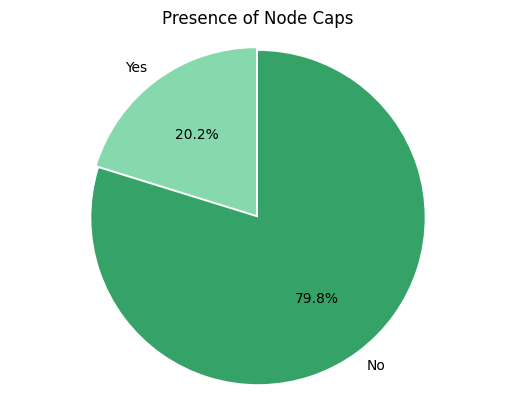

In [233]:
nodes_caps = ['Yes', 'No']
nodes_values = [56, 221]
explode = (0.02, 0)  # Separation for the first slice ('Yes')
colors = ['#86D9AC', '#35A367']
# Create a pie chart with separation and percentage labels
plt.pie(nodes_values, labels=nodes_caps, autopct='%1.1f%%', startangle=90, explode=explode, colors = colors)

plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.title("Presence of Node Caps")

plt.show()

In [234]:
df['deg-malig'].value_counts(ascending = True)

deg-malig
1     66
3     82
2    129
Name: count, dtype: int64

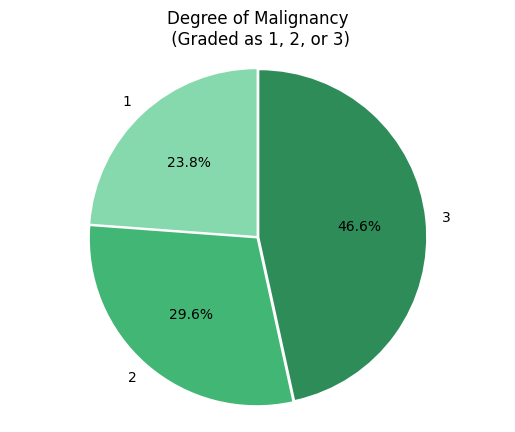

In [235]:
# Specify the degree of separation for each slice
deg_malig = ["1", "2", "3"]
deg_counts = [66, 82, 129]
explode = (0.01, 0.01, 0.01)  # Separation for the first slice (Premenopausal)
colors = colors = ['#86D9AC', '#41B675', '#2E8C59']
# Create a pie chart with separation
plt.pie(deg_counts, labels=deg_malig, autopct='%1.1f%%', startangle=90, explode=explode, colors = colors)

plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.title("Degree of Malignancy\n (Graded as 1, 2, or 3)")

plt.show()

In [236]:
df['breast'].value_counts(ascending = True)

breast
right    132
left     145
Name: count, dtype: int64

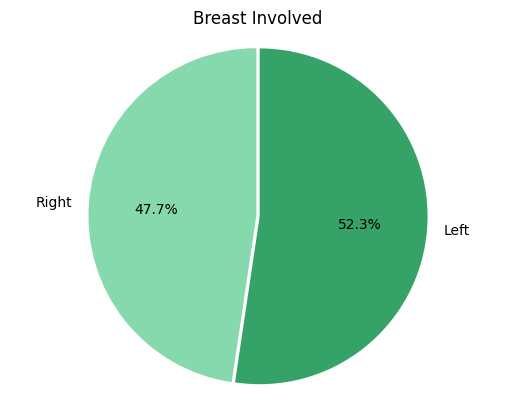

In [237]:
nodes_caps = ['Right', 'Left']
nodes_values = [132, 145]
explode = (0.02, 0)  # Separation for the first slice ('Yes')
colors = ['#86D9AC', '#35A367']
# Create a pie chart with separation and percentage labels
plt.pie(nodes_values, labels=nodes_caps, autopct='%1.1f%%', startangle=90, explode=explode, colors = colors)

plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.title("Breast Involved")

plt.show()

In [238]:
df['breast-quad'].value_counts(ascending = True)

breast-quad
central       21
right_low     23
right_up      33
left_up       94
left_low     106
Name: count, dtype: int64

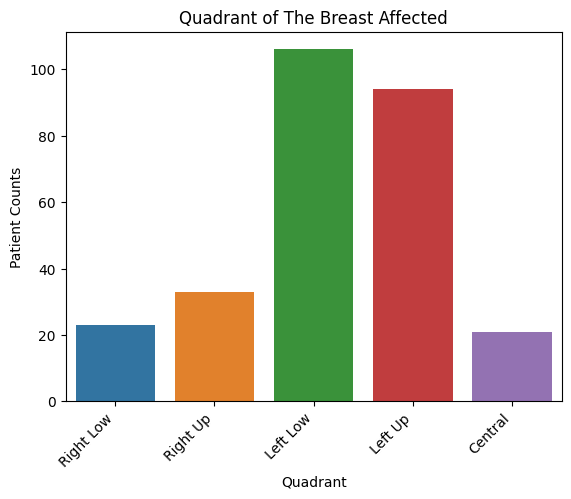

In [239]:
breast_quad = ["Right Low", "Right Up", "Left Low", "Left Up", "Central"]
quad_values = [23, 33, 106, 94, 21]
ax = sns.barplot(x = breast_quad, y = quad_values)
ax.set_xlabel("Quadrant")
ax.set_ylabel("Patient Counts")
ax.set_title("Quadrant of The Breast Affected")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = 'right')
plt.show()

In [240]:
df['irradiat'].value_counts(ascending = True)

irradiat
yes     62
no     215
Name: count, dtype: int64

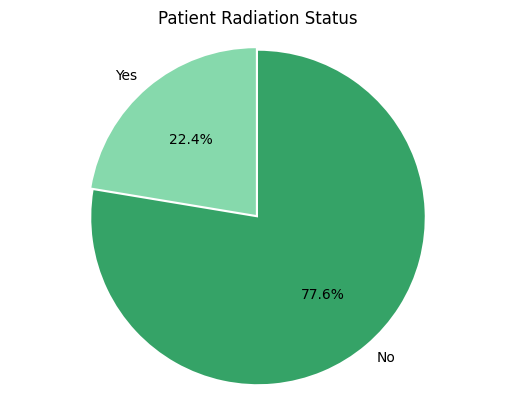

In [241]:
irradiat = ['Yes', 'No']
irr_values = [62, 215]
explode = (0.02, 0)  # Separation for the first slice ('Yes')
colors = ['#86D9AC', '#35A367']
# Create a pie chart with separation and percentage labels
plt.pie(irr_values, labels=irradiat, autopct='%1.1f%%', startangle=90, explode=explode, colors = colors)

plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.title("Patient Radiation Status")

plt.show()

In [243]:
df['relapse'].value_counts(ascending = True)

relapse
recurrence-events        81
no-recurrence-events    196
Name: count, dtype: int64

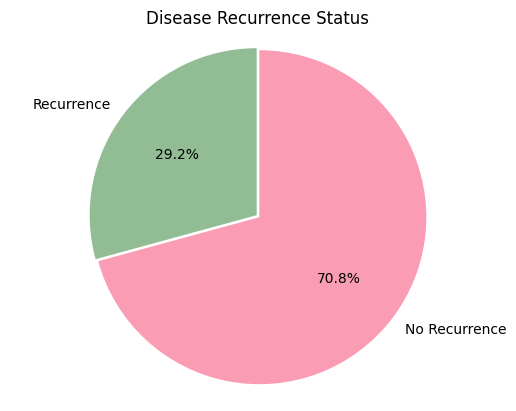

In [244]:
target = ['Recurrence', 'No Recurrence']
target_values = [81, 196]
explode = (0.02, 0)  # Separation for the first slice ('Yes')
colors = ['#91BC94', '#FB9CB5']
# Create a pie chart with separation and percentage labels
plt.pie(target_values, labels=target, autopct='%1.1f%%', startangle=90, explode=explode, colors = colors)

plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.title("Disease Recurrence Status")

plt.show()

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 277 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          277 non-null    object
 1   menopause    277 non-null    object
 2   tumor-size   277 non-null    object
 3   inv-nodes    277 non-null    object
 4   node-caps    277 non-null    object
 5   deg-malig    277 non-null    int64 
 6   breast       277 non-null    object
 7   breast-quad  277 non-null    object
 8   irradiat     277 non-null    object
 9   relapse      277 non-null    object
dtypes: int64(1), object(9)
memory usage: 23.8+ KB
